In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Read the dataset that merged the Global income and Cost and affordability of healthy diets
merged_pd = pd.read_csv("../cleaned_files/merged_income_diet_final.csv")
merged_pd.head()

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
0,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7004,Cost of a healthy diet (PPP dollar per person ...,PPP dollar per person per day,3.21,3.66
1,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7007,Cost of starchy staples,PPP dollar per person per day,0.54,0.57
2,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7008,Cost of animal source foods,PPP dollar per person per day,0.97,1.00
3,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7009,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,0.39
4,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7010,Cost of vegetables,PPP dollar per person per day,0.43,0.58


# Cost related to dietary choices across high, upper-middle, lower-middle, and low-income populations, particularly regarding healthy versus unhealthy foods?

In [3]:
# Extract the food categories from the merged data frame 
cost_dietary_df = merged_pd[(merged_pd['Item Code'] == 7007) | (merged_pd['Item Code'] == 7008) | (merged_pd['Item Code'] == 7009) | (merged_pd['Item Code'] == 7010) | (merged_pd['Item Code'] == 7011) | (merged_pd['Item Code'] == 7012)]
cost_dietary_df.head() 

,country,year,rural_pop_pct,gini_reported,q1,q2,q3,q4,q5,pop_gdp,...,staple_demand,region_un,oecd_member,incomegroup,Area Code,Item Code,Item,Unit,Y2017,Y2021
1,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7007,Cost of starchy staples,PPP dollar per person per day,0.54,0.57
2,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7008,Cost of animal source foods,PPP dollar per person per day,0.97,1.00
3,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7009,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,0.39
4,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7010,Cost of vegetables,PPP dollar per person per day,0.43,0.58
5,Armenia,2017.0,36.897,33.62,8.38,12.36,15.91,20.94,42.4,8745.0,...,0.0,Asia,Non-OECD,Upper middle income,1,7011,Cost of fruits,PPP dollar per person per day,0.49,0.88


In [4]:
# Select required columns needed to run the visualization that answers question 3
selected_columns = ['country', 'Item', 'Unit', 'Y2017', 'incomegroup']
dietary_df = cost_dietary_df[selected_columns]
dietary_df.head()

,country,Item,Unit,Y2017,incomegroup
1,Armenia,Cost of starchy staples,PPP dollar per person per day,0.54,Upper middle income
2,Armenia,Cost of animal source foods,PPP dollar per person per day,0.97,Upper middle income
3,Armenia,"Cost of legumes, nuts and seeds",PPP dollar per person per day,0.54,Upper middle income
4,Armenia,Cost of vegetables,PPP dollar per person per day,0.43,Upper middle income
5,Armenia,Cost of fruits,PPP dollar per person per day,0.49,Upper middle income


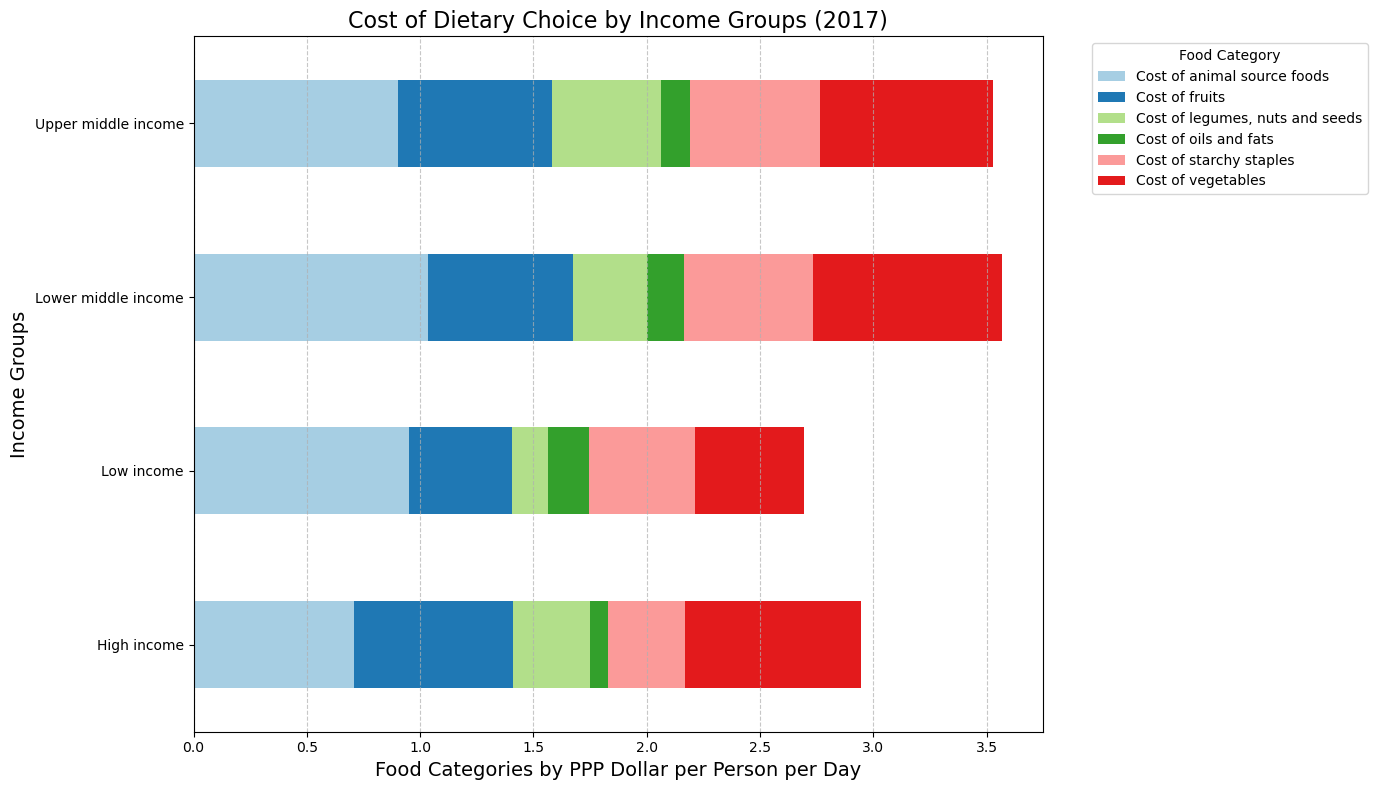

In [16]:
# Assuming dietary_df is already defined and contains required data
# Filter the data for the first 10 income groups
cost_diet = dietary_df[dietary_df['incomegroup'].isin(dietary_df['incomegroup'].unique()[:10])]
df_pivot = cost_diet.pivot_table(index='incomegroup', columns='Item', values='Y2017')

# Set custom color palette
colors = plt.cm.Paired(np.arange(len(df_pivot.columns)))

# Create a horizontal stacked bar chart
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(14, 8), color=colors)

# Adding titles and labels
plt.yticks(rotation=0)  # Change rotation of y-ticks for horizontal bars
plt.title('Cost of Dietary Choice by Income Groups (2017)', fontsize=16)
plt.xlabel('Food Categories by PPP Dollar per Person per Day', fontsize=14)
plt.ylabel('Income Groups', fontsize=14)
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Optionally adjust layout and show the plot
plt.tight_layout()
plt.savefig("../Output/stacked_bar_chart01.png")
plt.show()